<a href="https://colab.research.google.com/github/asdfasdf0311/2023DataAnalysisCompetition/blob/main/regression_spot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive #구글 드라이브에 데이터를 저장해서 데이터를 불러왔다.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#필요한 모듈가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib as mpl
import warnings
%matplotlib inline

In [ ]:
dat = pd.read_excel('/content/drive/MyDrive/2023datacontest/data/spot.xlsx')

In [ ]:
df = pd.DataFrame(dat)

In [ ]:
df

,지역,충전소,전기차대수,대학교,문화시설,의료기관병상수,경제활동인구,인구,공원면적,순이동,공공의료기관수,지역내총생산,논밭면적,도로보급
0,서울,629,61123,48,4.6,9.6,5320,9472127,4.6,-878,26,49648,613,8371
1,부산,187,24676,21,4.1,21.1,1746,3324335,13.6,-1100,9,29649,4832,3790
2,대구,295,25535,11,4.0,16.7,1267,2387911,7.7,-1247,9,25492,6017,3062
3,인천,215,27840,7,4.3,12.3,1692,2957044,13.1,2839,8,33287,17499,3373
4,광주,180,9761,17,5.1,27.2,772,1475262,12.2,-1272,9,29583,9240,1893
5,대전,171,14972,15,4.3,16.4,808,1479740,12.0,-324,8,31362,3858,2232
6,울산,77,5864,4,3.9,13.8,592,1120753,11.0,-906,1,69133,8984,2559
7,세종,88,3343,3,6.5,5.6,207,366227,67.9,178,1,37958,7021,423
8,경기,888,84533,61,4.4,10.4,7996,13652529,10.1,2315,32,38720,150188,14902
9,강원,284,14823,17,15.7,11.4,866,1521890,16.6,226,18,33319,101104,9814


In [ ]:
df = df.drop(['지역'],axis=1)

In [ ]:
df

,충전소,전기차대수,대학교,문화시설,의료기관병상수,경제활동인구,인구,공원면적,순이동,공공의료기관수,지역내총생산,논밭면적,도로보급
0,629,61123,48,4.6,9.6,5320,9472127,4.6,-878,26,49648,613,8371
1,187,24676,21,4.1,21.1,1746,3324335,13.6,-1100,9,29649,4832,3790
2,295,25535,11,4.0,16.7,1267,2387911,7.7,-1247,9,25492,6017,3062
3,215,27840,7,4.3,12.3,1692,2957044,13.1,2839,8,33287,17499,3373
4,180,9761,17,5.1,27.2,772,1475262,12.2,-1272,9,29583,9240,1893
5,171,14972,15,4.3,16.4,808,1479740,12.0,-324,8,31362,3858,2232
6,77,5864,4,3.9,13.8,592,1120753,11.0,-906,1,69133,8984,2559
7,88,3343,3,6.5,5.6,207,366227,67.9,178,1,37958,7021,423
8,888,84533,61,4.4,10.4,7996,13652529,10.1,2315,32,38720,150188,14902
9,284,14823,17,15.7,11.4,866,1521890,16.6,226,18,33319,101104,9814


데이터 통계량

In [ ]:
df.describe()

,충전소,전기차대수,대학교,문화시설,의료기관병상수,경제활동인구,인구,공원면적,순이동,공공의료기관수,지역내총생산,논밭면적,도로보급
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,298.647059,24846.058824,19.764706,7.729412,15.300000,1727.411765,3.043416e+06,17.141176,0.000000,13.470588,39292.470588,89843.294118,6665.529412
std,201.669885,20131.796208,15.295136,4.479783,5.818505,1969.045551,3.393737e+06,14.197890,1327.196858,9.104378,11678.059536,95976.928394,4493.994675
min,77.000000,3343.000000,3.000000,3.900000,5.600000,207.000000,3.662270e+05,4.600000,-2116.000000,1.000000,25492.000000,613.000000,423.000000
25%,187.000000,14972.000000,11.000000,4.300000,11.400000,808.000000,1.479740e+06,11.000000,-906.000000,8.000000,30912.000000,7021.000000,3062.000000
50%,220.000000,18832.000000,17.000000,6.500000,13.800000,1042.000000,1.787053e+06,13.100000,-2.000000,10.000000,33782.000000,55957.000000,6913.000000
75%,295.000000,25535.000000,21.000000,8.800000,19.500000,1692.000000,2.957044e+06,16.600000,226.000000,21.000000,45803.000000,150188.000000,9814.000000
max,888.000000,84533.000000,61.000000,19.200000,27.200000,7996.000000,1.365253e+07,67.900000,2839.000000,32.000000,69133.000000,277095.000000,14902.000000


### **데이터개수가 너무 적어서 데이터 증강**

In [ ]:
from sklearn.utils import shuffle

# 데이터 증강을 위해 데이터 섞기
df_shuffled = shuffle(df)

# 증강된 데이터 생성
augmented_data = df_shuffled.sample(frac=50, replace=True)

# 기존 데이터와 증강된 데이터 결합
combined_data = pd.concat([df, augmented_data], ignore_index=True)

# 증강된 데이터 개수 확인
print("Augmented Data Count:", len(combined_data))

Augmented Data Count: 867


In [ ]:
combined_data#증강된 데이터

,충전소,전기차대수,대학교,문화시설,의료기관병상수,경제활동인구,인구,공원면적,순이동,공공의료기관수,지역내총생산,논밭면적,도로보급
0,629,61123,48,4.6,9.6,5320,9472127,4.6,-878,26,49648,613,8371
1,187,24676,21,4.1,21.1,1746,3324335,13.6,-1100,9,29649,4832,3790
2,295,25535,11,4.0,16.7,1267,2387911,7.7,-1247,9,25492,6017,3062
3,215,27840,7,4.3,12.3,1692,2957044,13.1,2839,8,33287,17499,3373
4,180,9761,17,5.1,27.2,772,1475262,12.2,-1272,9,29583,9240,1893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,450,25495,20,6.9,19.5,1835,3305931,17.1,-2116,21,33782,136294,12020
863,77,5864,4,3.9,13.8,592,1120753,11.0,-906,1,69133,8984,2559
864,77,5864,4,3.9,13.8,592,1120753,11.0,-906,1,69133,8984,2559
865,171,14972,15,4.3,16.4,808,1479740,12.0,-324,8,31362,3858,2232


In [ ]:
null_data=combined_data.isnull().sum().to_frame('null_count') #결측치 없음
null_data

,null_count
충전소,0
전기차대수,0
대학교,0
문화시설,0
의료기관병상수,0
경제활동인구,0
인구,0
공원면적,0
순이동,0
공공의료기관수,0


### **산점도 및 회귀선**

In [ ]:
plot_cols=['충전소','전기차대수','대학교','문화시설','의료기관병상수','경제활동인구','인구','공원면적','순이동','공공의료기관수','지역내총생산','논밭면적','도로보급']
plot_df=combined_data.loc[:,plot_cols]
plot_df.head()

,충전소,전기차대수,대학교,문화시설,의료기관병상수,경제활동인구,인구,공원면적,순이동,공공의료기관수,지역내총생산,논밭면적,도로보급
0,629,61123,48,4.6,9.6,5320,9472127,4.6,-878,26,49648,613,8371
1,187,24676,21,4.1,21.1,1746,3324335,13.6,-1100,9,29649,4832,3790
2,295,25535,11,4.0,16.7,1267,2387911,7.7,-1247,9,25492,6017,3062
3,215,27840,7,4.3,12.3,1692,2957044,13.1,2839,8,33287,17499,3373
4,180,9761,17,5.1,27.2,772,1475262,12.2,-1272,9,29583,9240,1893


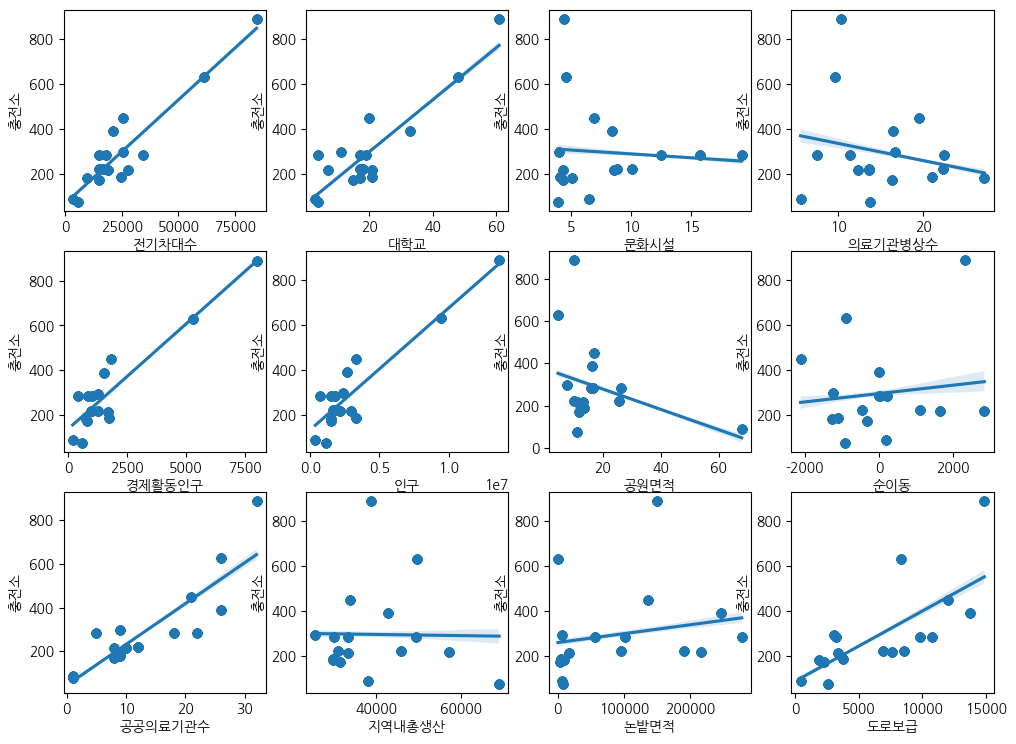

In [ ]:
plt.figure(figsize=(12,12))
for idx, col in enumerate(plot_cols[1:]):
  ax1=plt.subplot(4,4, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=combined_data, ax=ax1)
plt.show()

일부 독립변수에 대해 산점도 및 회귀선을 확인하면 [전기차대수, 대학교, 경제활동인구, 인구, 공공의료기관수, 도로보급] 이 충전소 수와 선형관계가 있어보인다.

**종속변수 : 충전소**

**데이터를 학습 데이터와 테스트 데이터로 분할**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = combined_data.drop('충전소', axis=1) #종속변수를 제외한 나머지 독립변수들
y = combined_data.loc[:,['충전소']] #종속변수

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)

In [ ]:
#선형회귀 OLS 학습/예측/평가
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}")
print(f"Variance score: {r2:.3f}")

MSE: 219.470, RMSE: 14.815
Variance score: 0.993


회귀계수

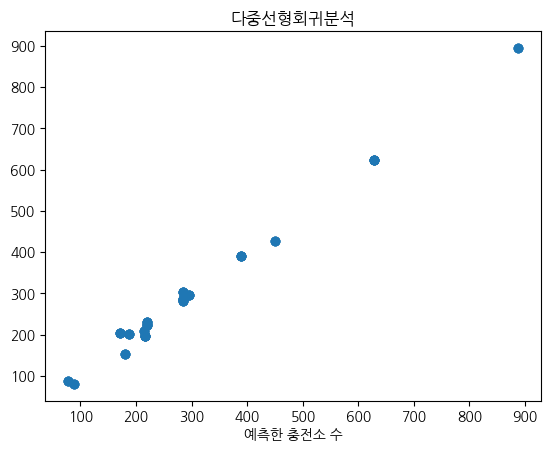

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.4)
plt.xlabel('실제 충전소 수')
plt.xlabel('예측한 충전소 수')#정답을 맞춘다면 정확히 선으로 일치되어 나올 것이다.
plt.title('다중선형회귀분석')
plt.show()

잘 맞춘다. (선형임)

In [ ]:
#회귀계수
lr.coef_

array([[ 2.38938906e-03, -2.92257974e+00, -2.33338424e+00,
        -6.28106783e+00,  6.24251870e-01, -3.26054466e-04,
        -1.46552487e+00, -4.37386913e-02,  1.03026571e+01,
        -2.11387328e-03,  3.02030937e-04, -4.71610095e-03]])

In [ ]:
lr.score(X_train,y_train)

0.9941198585335447